<a href="https://colab.research.google.com/github/Utkarsh-jain8077/Mini.Project/blob/main/Image_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


In [4]:
Categories=['Cars','Cricket ball','Ice cream cone']
flat_data_arr=[]
target_arr=[]
datadir="/content/drive/MyDrive/data for image classification"
for i in Categories:
  print(f"loding category..{i}")
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'category is loaded..{i}')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df



loding category..Cars
category is loaded..Cars
loding category..Cricket ball
category is loaded..Cricket ball
loding category..Ice cream cone
category is loaded..Ice cream cone


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.184641,0.170915,0.162092,0.263725,0.237255,0.174510,0.286275,0.243137,0.173203,0.286275,0.235294,0.184314,0.274510,0.229412,0.188235,0.211111,0.191503,0.176471,0.204248,0.184641,0.172876,0.211765,0.192157,0.170588,0.211765,0.192157,0.168627,0.207843,0.192157,0.168627,0.159804,0.155882,0.143137,0.137255,0.147386,0.143464,0.160131,0.162418,0.156536,0.156863,...,0.592157,0.596078,0.615686,0.611111,0.615033,0.634641,0.607843,0.611765,0.621569,0.596405,0.600327,0.608170,0.607516,0.611438,0.619281,0.607843,0.611765,0.619608,0.598039,0.601961,0.609804,0.609804,0.609804,0.617647,0.608824,0.608824,0.616667,0.595425,0.597712,0.605556,0.592157,0.596078,0.603922,0.601961,0.605882,0.615686,0.583660,0.587582,0.607190,0
1,0.717647,0.717647,0.717647,0.721569,0.721569,0.721569,0.723582,0.723582,0.723582,0.725490,0.725490,0.725490,0.728458,0.728458,0.727503,0.736301,0.736301,0.730418,0.743190,0.743190,0.735346,0.745098,0.745098,0.737255,0.749020,0.749020,0.741176,0.757817,0.757817,0.749974,0.768627,0.768627,0.760784,0.780392,0.780392,0.772549,0.784314,0.784314,0.776471,0.788235,...,0.337255,0.321569,0.309804,0.341176,0.325490,0.313725,0.341176,0.325490,0.313725,0.341176,0.325490,0.313725,0.341176,0.325490,0.313725,0.345098,0.325490,0.313725,0.341176,0.325490,0.313725,0.341176,0.321569,0.309804,0.341176,0.321569,0.309804,0.341176,0.325490,0.313725,0.338209,0.320562,0.308797,0.337255,0.317647,0.305882,0.335346,0.317647,0.305882,0
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3,0.442745,0.476863,0.421176,0.572549,0.653333,0.714118,0.539216,0.705882,0.805882,0.509412,0.706275,0.788627,0.537255,0.690196,0.793333,0.540000,0.690196,0.811765,0.541569,0.694118,0.795686,0.566667,0.688235,0.784314,0.549804,0.686275,0.795686,0.538431,0.681176,0.778039,0.556863,0.678431,0.745098,0.533333,0.682745,0.768627,0.533333,0.686275,0.764706,0.529412,...,0.321569,0.384314,0.439216,0.325490,0.388235,0.447059,0.330588,0.393333,0.452157,0.337255,0.400000,0.458824,0.337255,0.400000,0.458824,0.337255,0.400000,0.458824,0.341176,0.403922,0.462745,0.329412,0.392157,0.450980,0.325490,0.388235,0.447059,0.329412,0.392157,0.450980,0.319608,0.382353,0.441176,0.309804,0.372549,0.431373,0.317647,0.369804,0.427451,0
4,0.736863,0.748627,0.772549,0.737255,0.749020,0.772824,0.737255,0.749020,0.776471,0.741176,0.749412,0.780118,0.741176,0.749412,0.780392,0.745098,0.749412,0.780392,0.752941,0.752941,0.784314,0.752941,0.753137,0.786275,0.752941,0.760784,0.792157,0.753333,0.764706,0.796078,0.756863,0.768627,0.796078,0.756863,0.768627,0.796078,0.757255,0.769020,0.796471,0.764706,...,0.898039,0.901961,0.921569,0.898039,0.901961,0.921569,0.898039,0.901961,0.921569,0.893765,0.897686,0.917294,0.894118,0.898039,0.917647,0.890196,0.894118,0.913725,0.890196,0.894118,0.913725,0.890196,0.894118,0.913725,0.886275,0.890196,0.909804,0.886275,0.890196,0.909804,0.882353,0.886275,0.905882,0.882353,0.886275,0.905882,0.878431,0.882353,0.901961,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [6]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [7]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [8]:
print(y_test)

20    0
24    0
72    2
76    2
19    0
65    1
68    1
84    2
23    0
43    1
77    2
83    2
31    0
48    1
85    2
32    0
37    0
38    0
51    1
45    1
Name: Target, dtype: int64


In [9]:
accuracy_score(y_pred,y_test)

1.0

In [26]:
pickle.dump(model,open("img_model.p","wb"))



In [29]:
model=pickle.load(open('img_model.p','rb'))

Enter URL of Imagehttps://imgd.aeplcdn.com/0x0/n/cw/ec/41406/bmw-8-series-right-front-three-quarter8.jpeg
(723, 1280, 3)
PREDICTEDCars


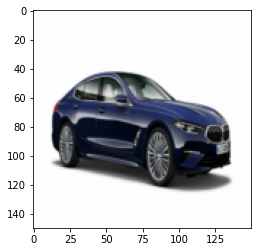

In [31]:
from skimage.io import imread
url=input('Enter URL of Image')
img=imread(url)
flat_data=[]
img=np.array(img)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=Categories[y_out[0]]
print(f'PREDICTED{y_out}')




In [32]:
!pip install streamlit 
!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [33]:
%%writefile app.py

from PIL import Image
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
st.title('Image classification Model Using ML')
st.text('Upload the image')
model=pickle.load(open('img_model.p','rb'))
uploaded_file=st.file_uploader('Choose an image',type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption="Uploaded image")
  if st.button("PREDICT"):
    st.write('Result')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out=model(flat_data)
    y_out=Categories[y_out[0]]
    st.write(f'Predicted output:{y_out}')

Writing app.py


In [35]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url
